In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats
import seaborn as sns

df1 = pd.read_csv(r'uncleandata.csv')
df2 = pd.read_csv(r'breast_cancer3.csv')


df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()


In [2]:
#cleaning up df1 removing columns
updated_df1 = df1.drop(columns=['race','marital status','differentiate','grade','6th stage','a stage'])

In [3]:
updated_df2 = df2.drop(columns=['age1','deg-malig','tumor-size','inv-nodes','node-caps'])

In [4]:
df1['age'] = df1['age'].astype('int64')
df2['age'] = df2['age'].astype('int64')

# #  Merged Dataframe
merged_df = pd.merge(updated_df1,updated_df2, on='age')

merged_df.columns = merged_df.columns.str.capitalize()

In [5]:
#merged_df.to_csv('output.csv', index=False)

In [6]:
#Slim down DataFrame
merged_75_df = merged_df.sample(frac=0.75)
merged_25_df = merged_df.drop(merged_75_df.index)
clean_merged_25_df = merged_25_df.dropna()

In [7]:
menopause_status = ['premeno', 'ge40', 'lt40']

survival_list = []

#Search through unique values in Menopause to extract their months of survival
for menopause in menopause_status:
    survival_data = clean_merged_25_df[clean_merged_25_df['Menopause'] == menopause]['Survival months']
    survival_list.append(survival_data)

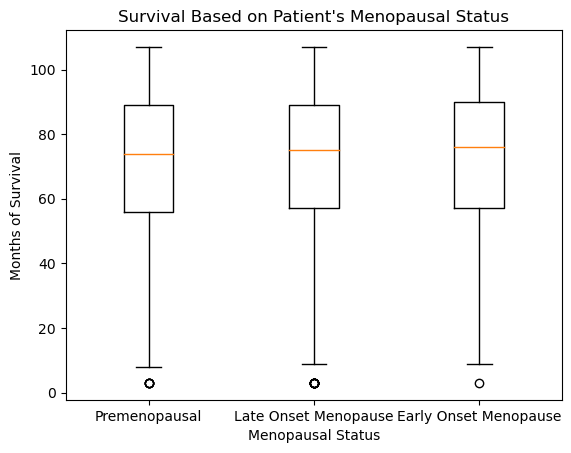

In [8]:
#Boxplot of Survival Months per Menopause Status
plt.boxplot(survival_list, labels=('Premenopausal', 'Late Onset Menopause', 'Early Onset Menopause'))
plt.title("Survival Based on Patient's Menopausal Status")
plt.xlabel('Menopausal Status')
plt.ylabel('Months of Survival');

In [9]:
#New DataFrames for Describe Plots below
survival_describe = clean_merged_25_df['Survival months'].agg(['min','mean','std','median','max'])
age_describe = clean_merged_25_df['Age'].agg(['min','mean','std','median','max'])

Text(0, 0.5, 'Age of Patient')

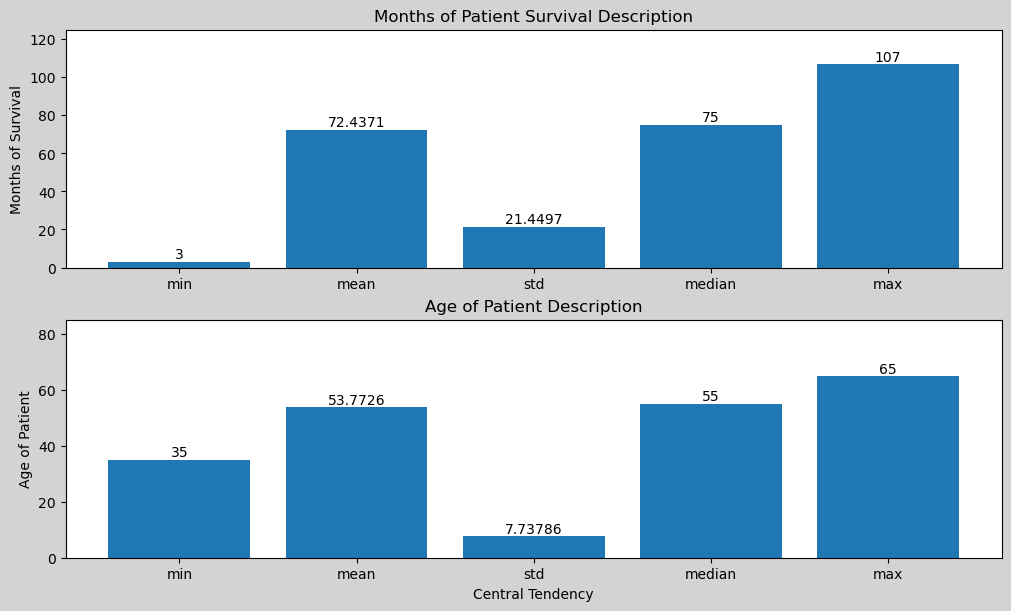

In [10]:
#Figure window
fig, axs = plt.subplots(2, 1, layout='constrained', figsize=[10,6], facecolor='lightgrey')

#Figure 1
p = axs[0].bar(survival_describe.keys(),survival_describe)
axs[0].bar_label(p)
axs[0].set_ylim(bottom=0, top=125)
axs[0].set_title('Months of Patient Survival Description')
axs[0].set_ylabel('Months of Survival')

#Figure 2
q = axs[1].bar(age_describe.keys(),age_describe)
axs[1].bar_label(q)
axs[1].set_ylim(bottom=0, top=85)
axs[1].set_title('Age of Patient Description')
axs[1].set_xlabel('Central Tendency')
axs[1].set_ylabel('Age of Patient')

In [19]:
#Cleaning up DataFrame
survival_bins_df = clean_merged_25_df.drop(['T stage ',
                                            'N stage', 
                                            'Tumor size', 
                                            'Estrogen status', 
                                            'Progesterone status', 
                                            'Regional node examined', 
                                            'Reginol node positive', 
                                            'Status', 
                                            'Breast', 
                                            'Breast-quad', 
                                            'Irradiat', 
                                            'Class'], 
                                            axis=1)

In [20]:
survival_bins = [2, 45, 60, 75, 90, 107]

survival_labels = ['<45', '45-60', '60-75', '75-90', '90-107']

#Add ranges to new DataFrame
survival_bins_df['Survival ranges'] = pd.cut(survival_bins_df['Survival months'], 
                                                bins=survival_bins, 
                                                right=True, 
                                                labels=survival_labels)

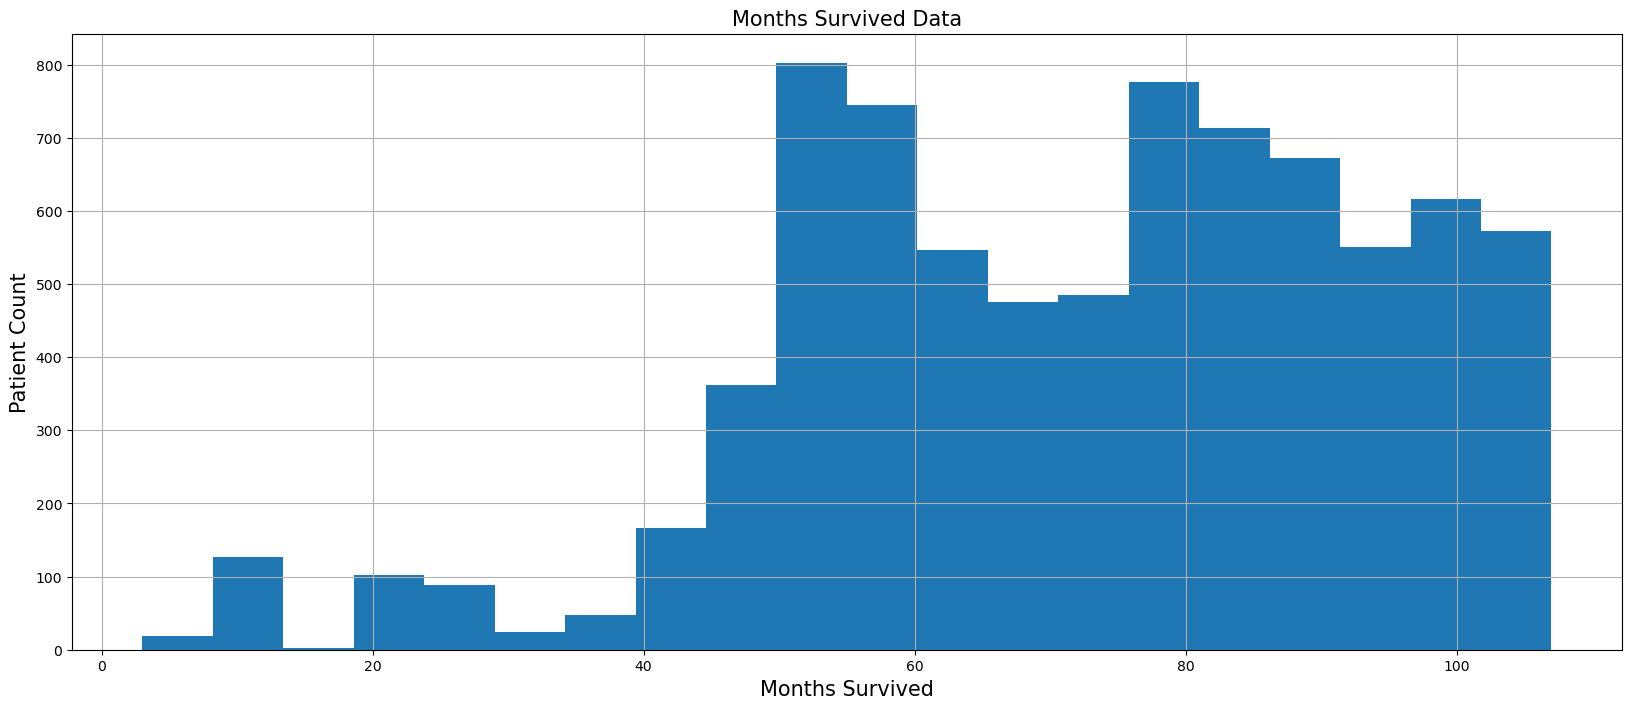

In [22]:
#Histogram of Survival data
survival_hist_df = survival_bins_df.drop('Age', axis=1)
survival_hist_df.hist(figsize=[20,8], bins=20)
plt.title('Months Survived Data', fontsize=15)
plt.xlabel('Months Survived', fontsize=15)
plt.ylabel('Patient Count', fontsize=15);

In [26]:
# Retrieve values for survival_counts
# premeno_df = survival_bins_df[survival_bins_df['Menopause'] == 'premeno']
# ge40_df = survival_bins_df[survival_bins_df['Menopause'] == 'ge40']
# lt40_df = survival_bins_df[survival_bins_df['Menopause'] == 'lt40']

# lt40_df['Survival ranges'].value_counts()

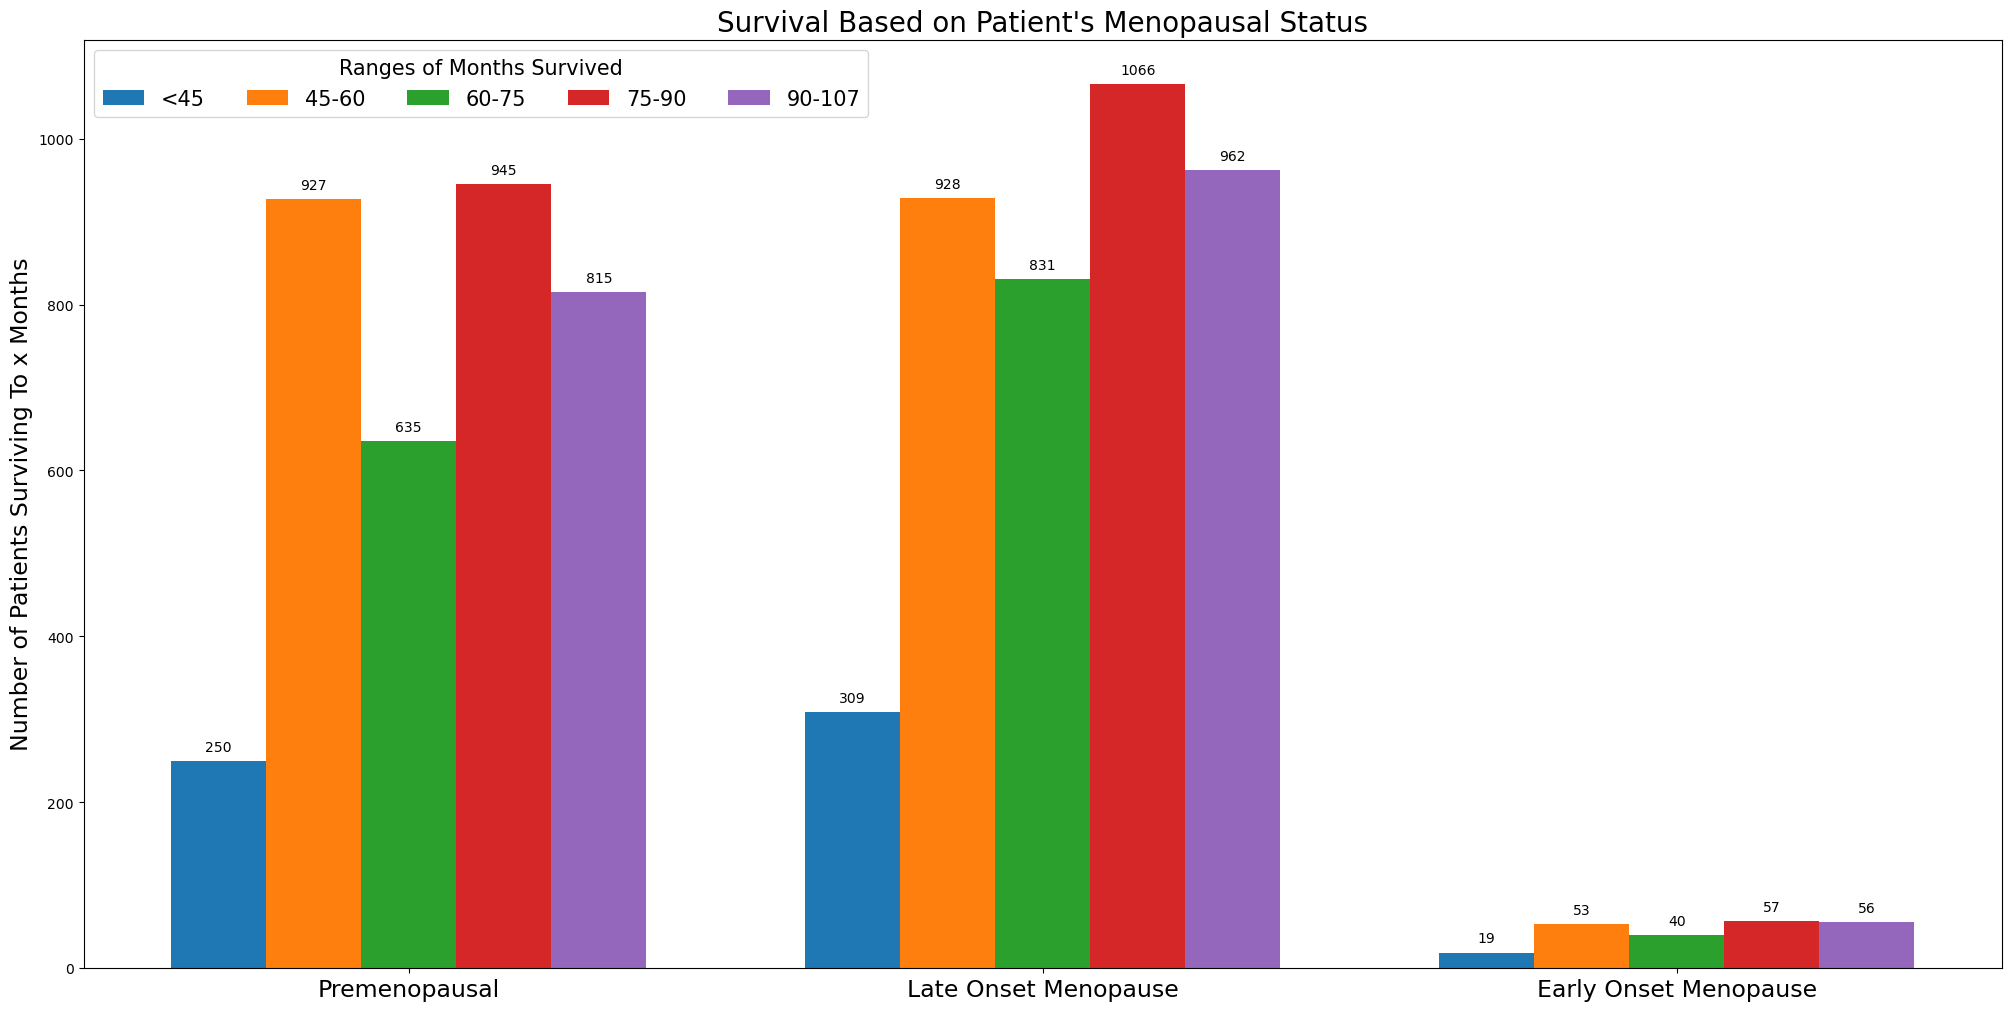

In [28]:
menopause = ('Premenopausal', 'Late Onset Menopause', 'Early Onset Menopause')
survival_counts = {'<45': (250, 309, 19),
                  '45-60': (927, 928, 53), 
                  '60-75': (635, 831, 40), 
                  '75-90': (945, 1066, 57), 
                  '90-107': (815, 962, 56)}

x = np.arange(len(menopause))
width = 0.15
multiplier = 0

#Firgure window
fig, ax = plt.subplots(layout='constrained', figsize=[20,10])

#Bars and bar labels
for key, value in survival_counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, value, width, label=key)
    ax.bar_label(rects, padding=5)
    multiplier += 1

#Labels
ax.set_ylabel('Number of Patients Surviving To x Months', fontsize=17)
ax.set_title("Survival Based on Patient's Menopausal Status", fontsize=20)
ax.set_xticks(x + width + 0.15, menopause, fontsize=17)
ax.legend(loc='upper left', ncols=5, title='Ranges of Months Survived', title_fontsize=15, fontsize=15)

plt.show()